In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import phate

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers, k_means_pp, ICT_clusters, cfilter, cassign
from External.generation import create_graph, find_backbone
from External.plotting import plot_points, plot_graph, no_intersections
from External.reweight import reweight_clusters
from External.data_loader import data_loader

from copy import deepcopy

# from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

In [5]:
# Hyperparameters
mode = "K_Nearest" # Graph construction mode
ICT_algorithm = "cluster_all"
metric = "euclidean" # metric for clustering

# Cluster rassignment
min_cluster_size = 12

In [6]:
position, labels, embedding = data_loader("eth_CC", True)
dtae_embedding, dtae_labels = data_loader("CC_DTAE_embedding", False)

number_of_nodes = len(position)

# calculate the clusters
pca = PCA(n_components=100).fit_transform(StandardScaler().fit_transform(position))

In [7]:
old_G, _ = create_graph(number_of_nodes, mode, position=position)
old_G.indexEdges()

cluster_centers2 = centers(position)
old_ICT = calculate_ICT(old_G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers2, zeros_stay_zeros=True, update_G=1.1)
old_ICT.indexEdges()

Final k: 11
sklearn is done: 382.3248224258423
My own part is done: 89.43235158920288


create edgeId array:   0%|          | 0/149792 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149792 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

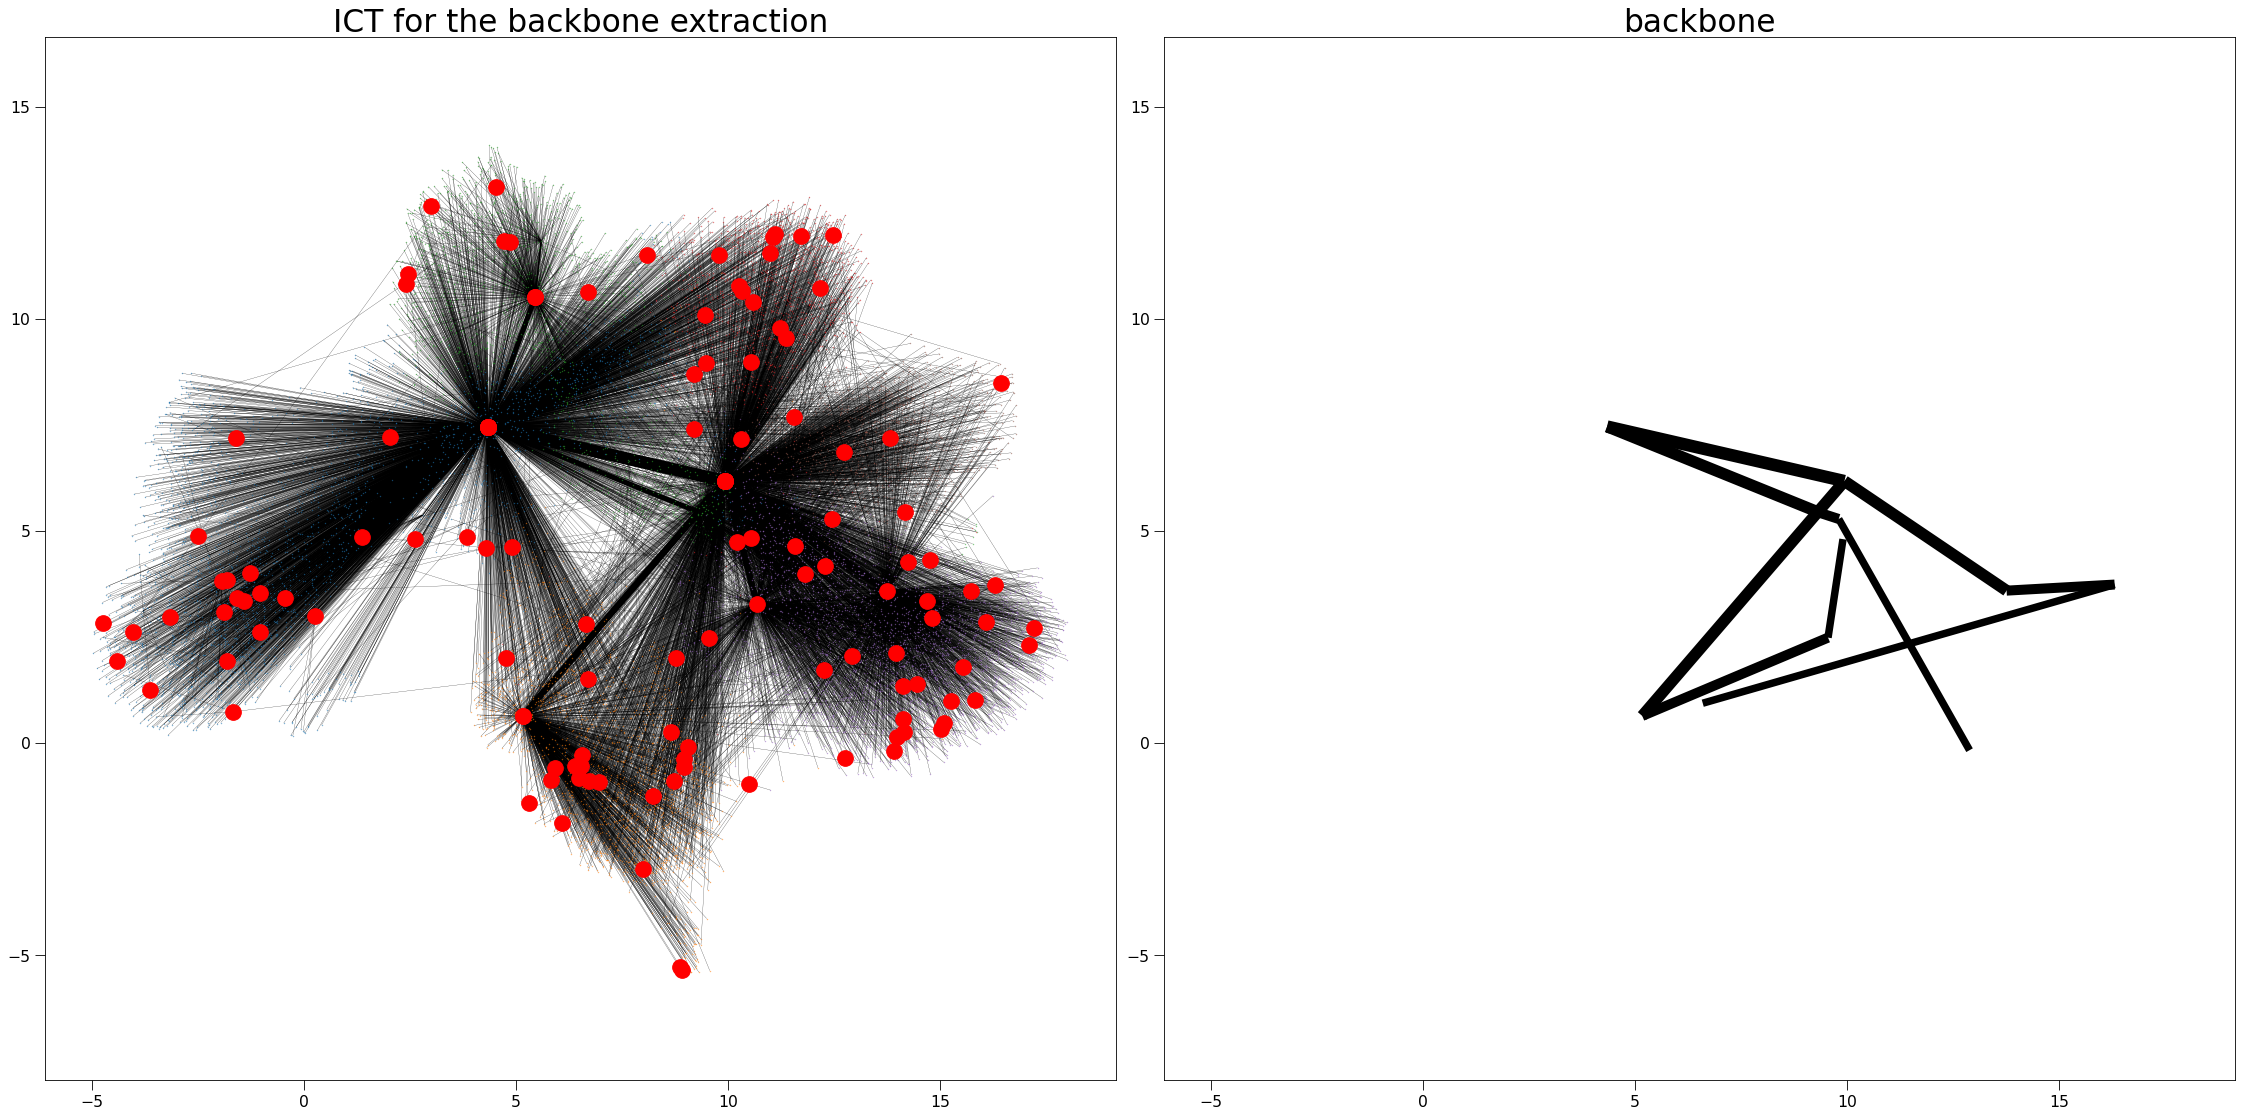

In [8]:
backbone, backbone_nodes = find_backbone(old_ICT, number_of_vertices=1)
backbone.indexEdges()

# Plot the ICT
fig, axs = plt.subplots(1, 2)
plot_points(embedding, f"", axs[0], labels=labels, node_size=0.5)
axs[0].get_legend().remove()
plot_graph(old_ICT, embedding, f"ICT for the backbone extraction", axs[0], cluster_centers=cluster_centers2, node_size=0)

plot_graph(backbone, embedding, f"backbone", axs[1], node_size=0)

plt.tight_layout()
plt.show()

/net/hcihome/storage/flernst/BT/External/clustering.py:309: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 384.29897928237915
My own part is done: 86.62645101547241


create edgeId array:   0%|          | 0/149792 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149792 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

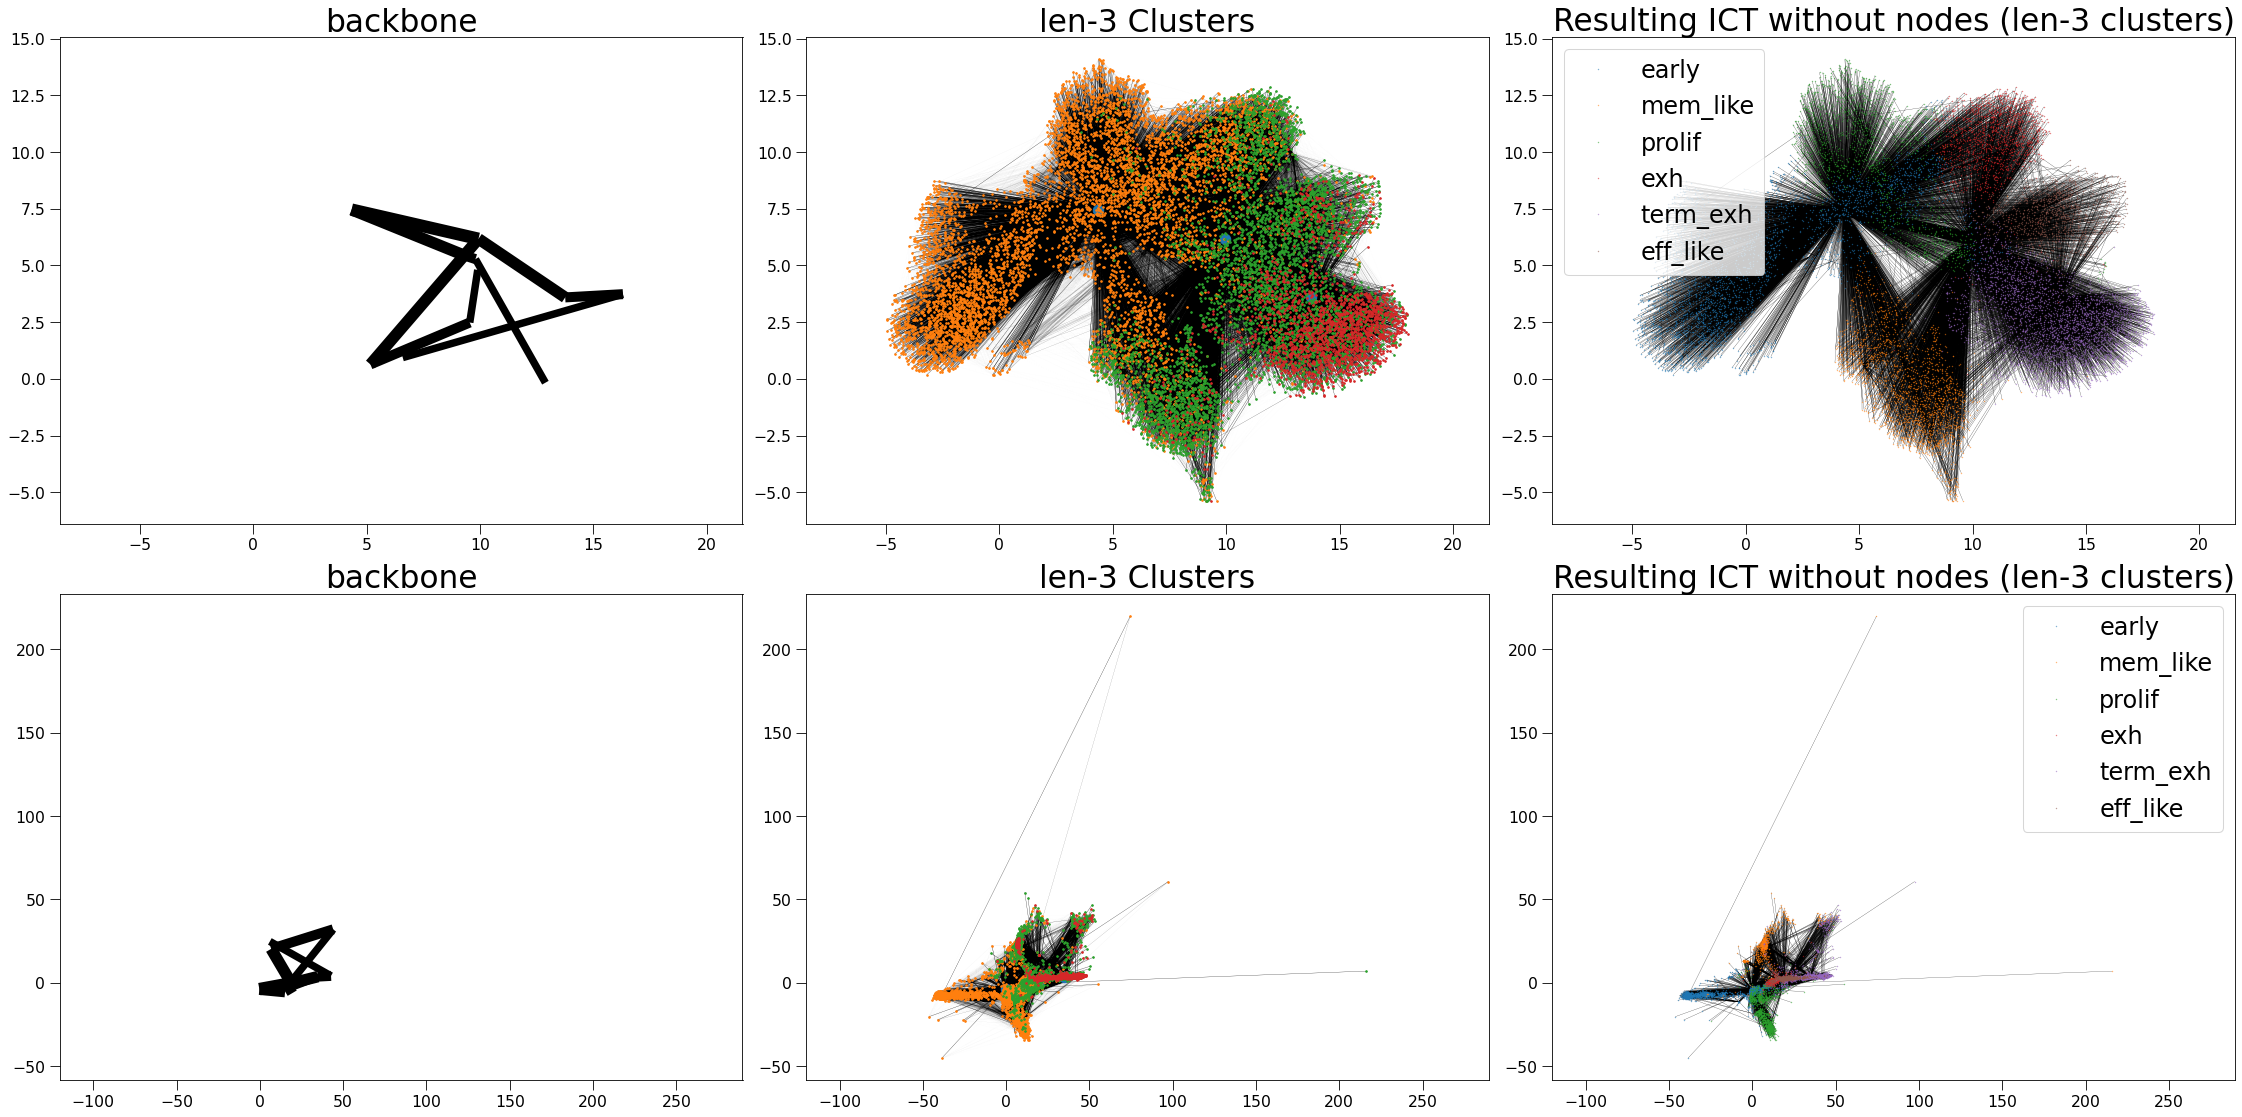

/net/hcihome/storage/flernst/BT/External/clustering.py:309: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 366.0586619377136
My own part is done: 83.15342831611633


create edgeId array:   0%|          | 0/149792 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149792 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

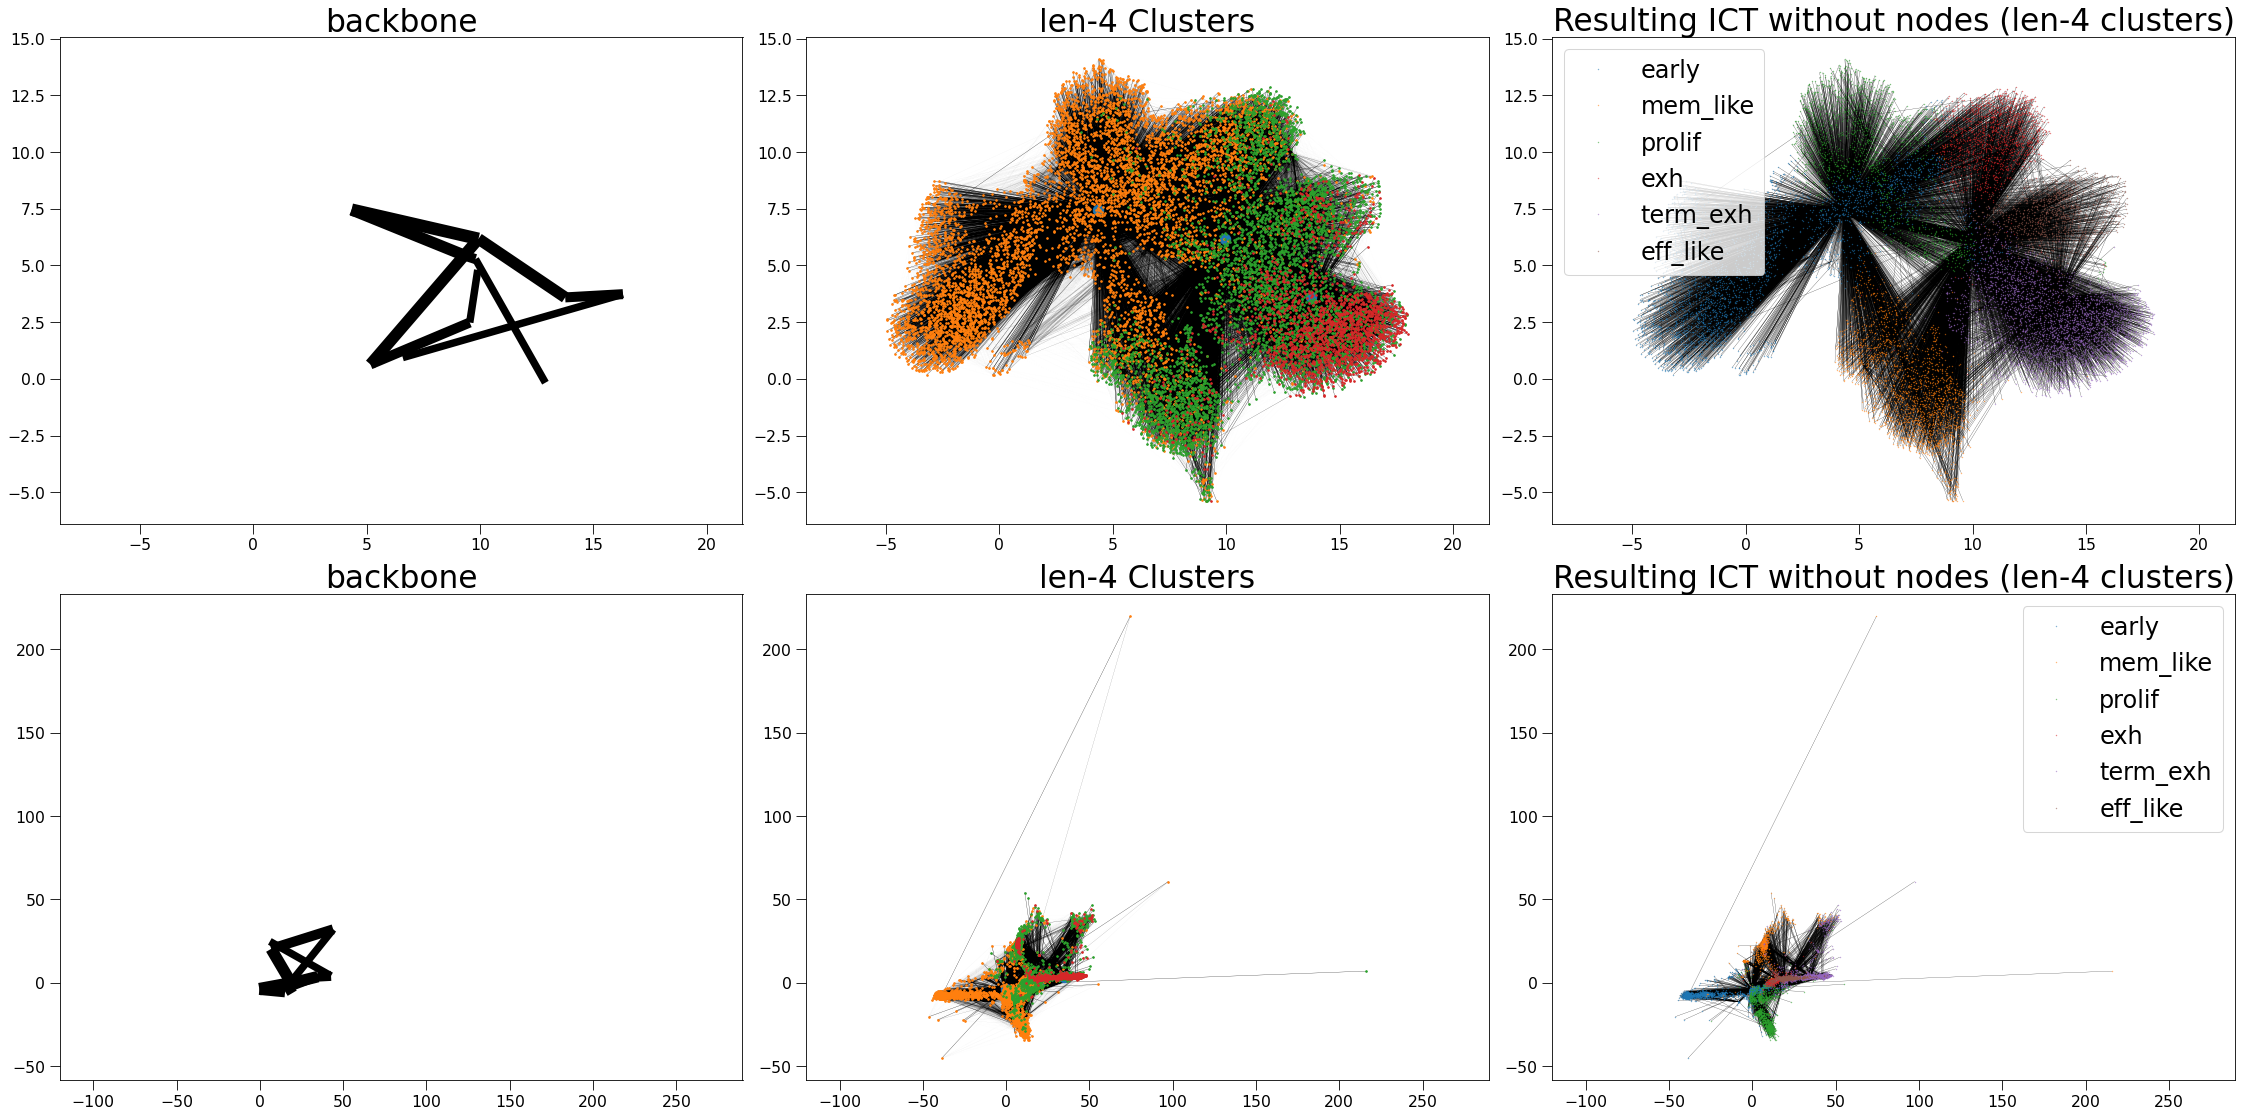

/net/hcihome/storage/flernst/BT/External/clustering.py:309: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 385.54759192466736
My own part is done: 89.43625926971436


create edgeId array:   0%|          | 0/149792 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149792 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

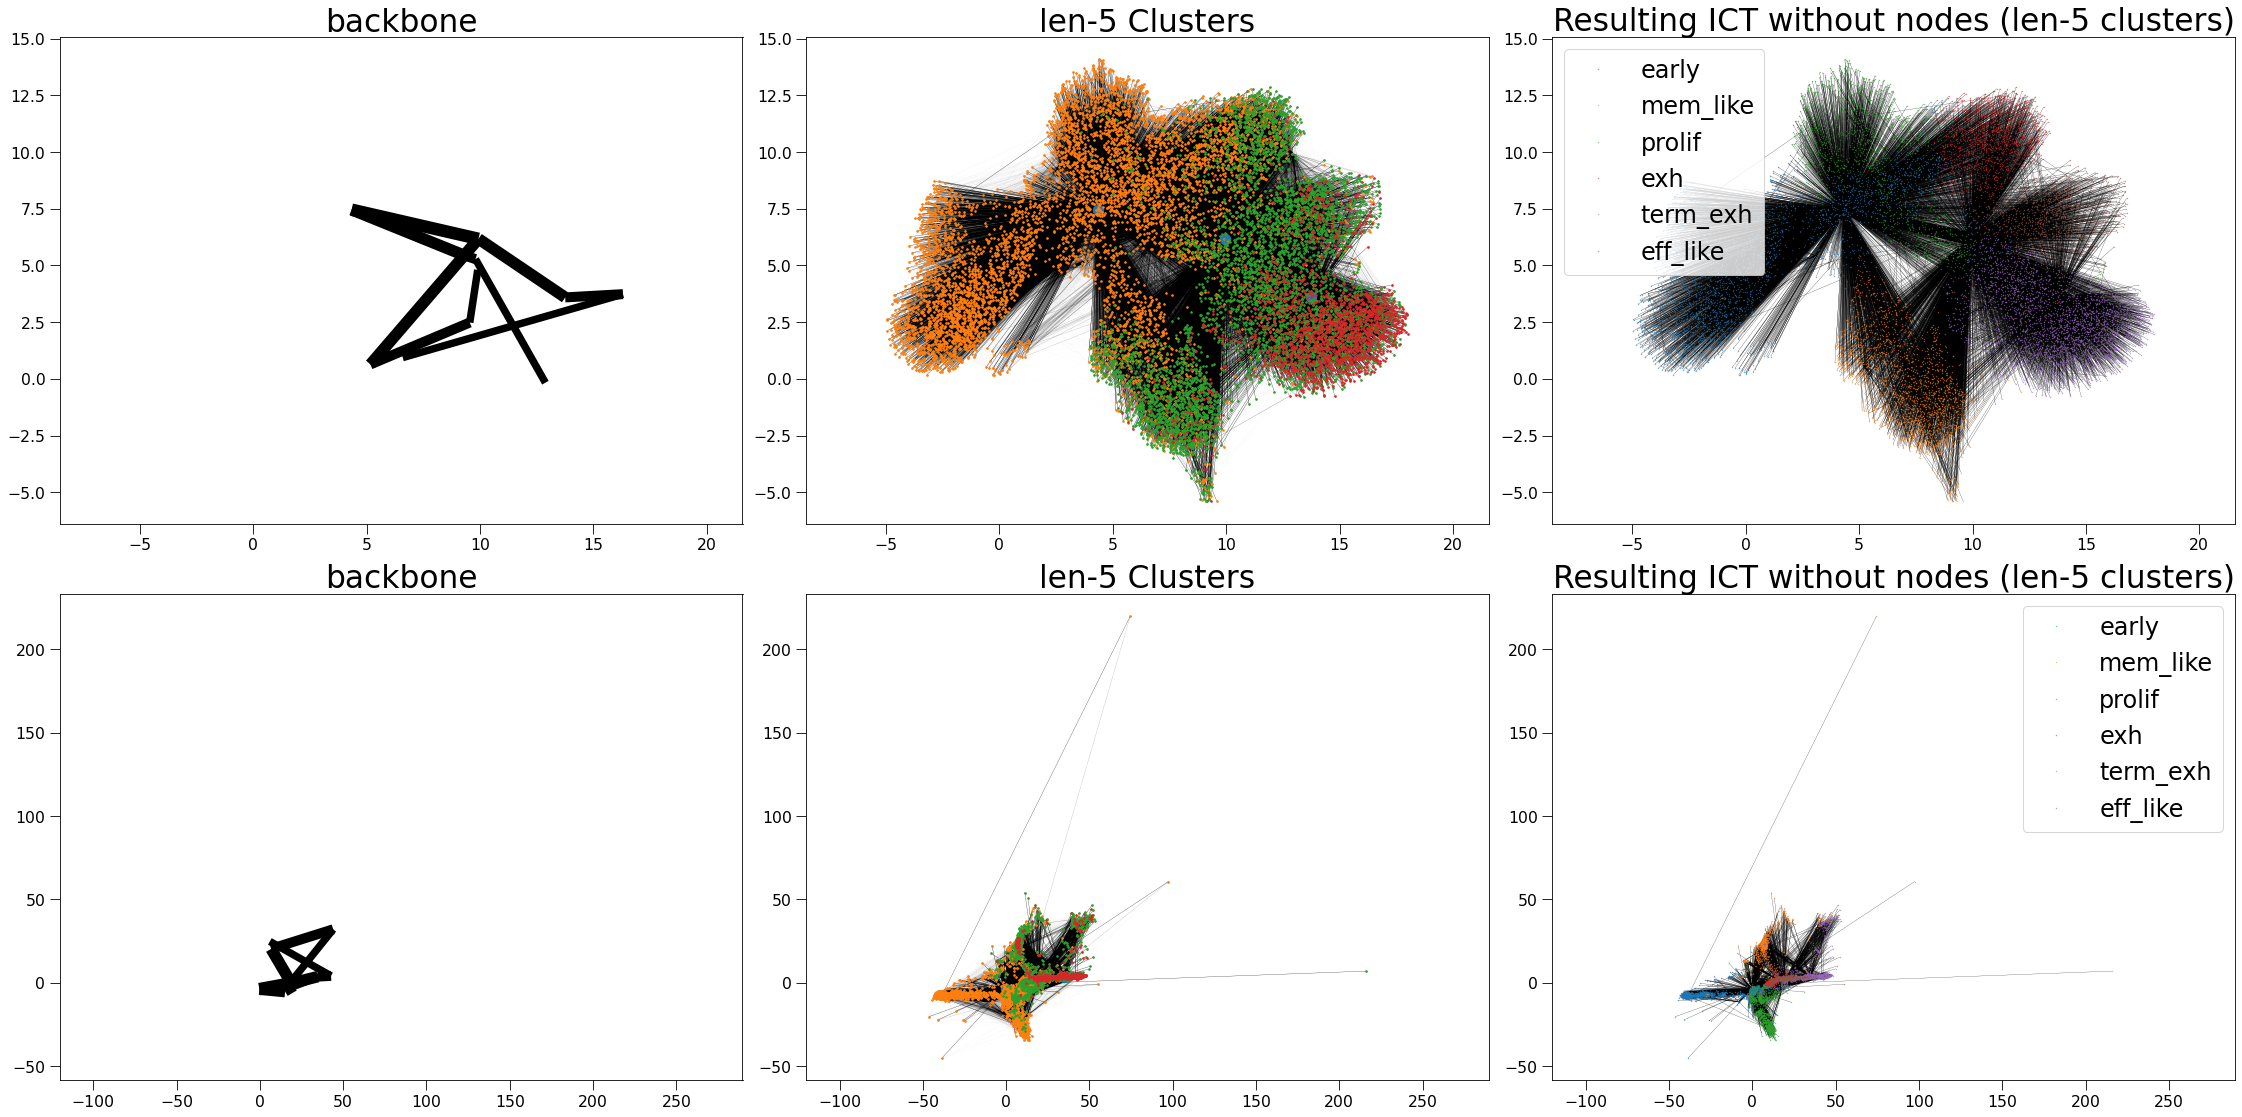

/net/hcihome/storage/flernst/BT/External/clustering.py:309: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 360.47780776023865
My own part is done: 90.00023937225342


create edgeId array:   0%|          | 0/149792 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149792 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

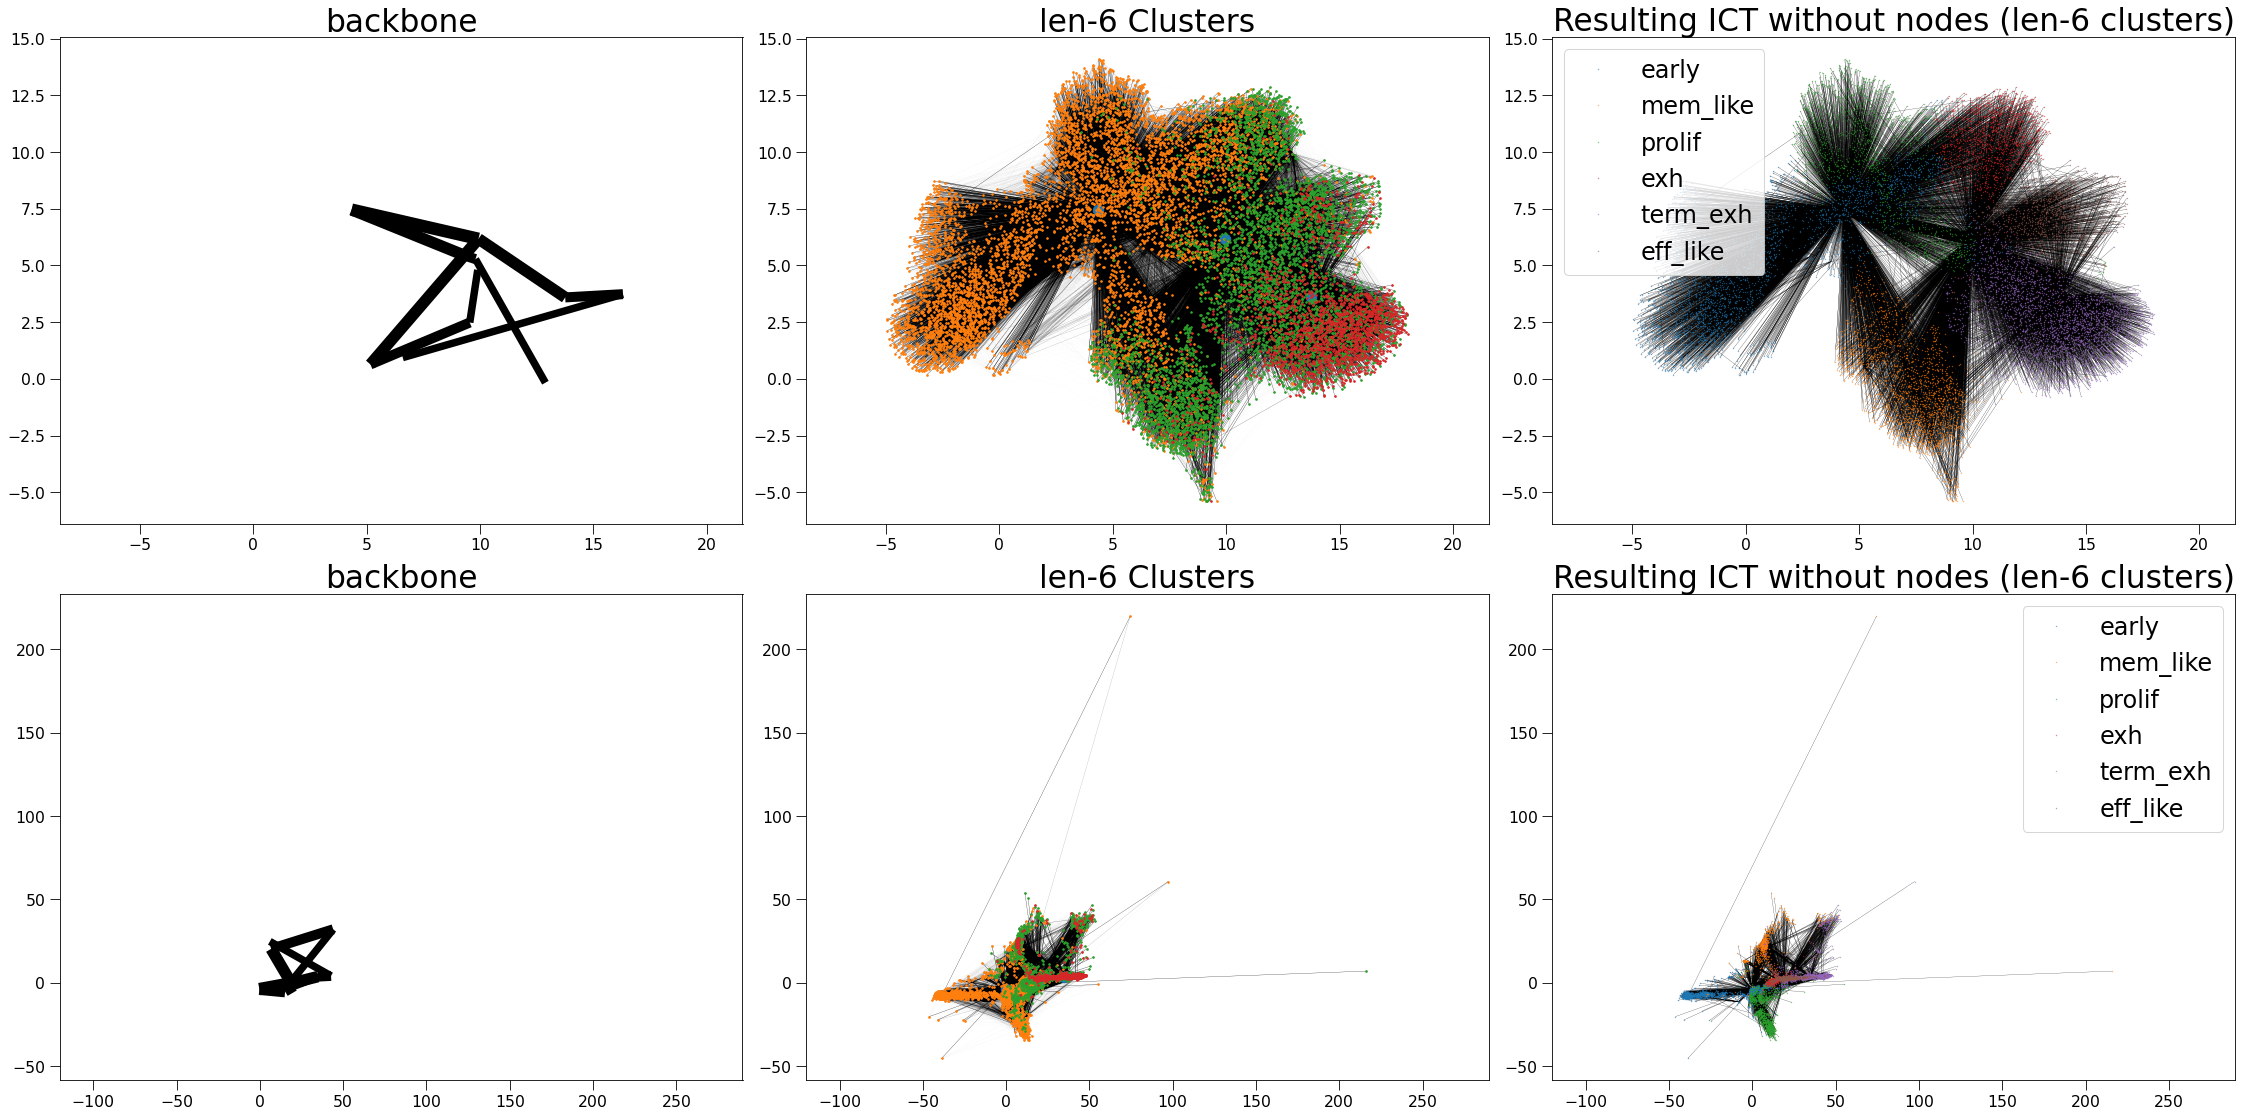

In [9]:
for k in range(3,7):
    
    G = deepcopy(old_G)
    cluster_centers, cluster_labels = ICT_clusters(old_ICT, position, number_of_vertices=1, avg_cluster_len=k, log=False)

    cluster_centers, cluster_labels = cassign(cluster_centers, cluster_labels, position, t=min_cluster_size)

    G = reweight_clusters(position, G, cluster_centers, cluster_labels, min_scale = 0.3, max_scale=1.1)
    
    G.indexEdges()
    
    cluster_centers2 = centers(position)
    
    ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers2, zeros_stay_zeros=True, update_G=1.1)
        
    ICT.indexEdges()
    
    # Plot the ICT
    fig, axs = plt.subplots(2, 3)
    
    plot_graph(backbone, embedding, f"backbone", axs[0,0], node_size=0)
    
    plot_graph(G, embedding, f"", axs[0,1], node_size=0)
    plot_points(embedding[cluster_centers], f"", axs[0,1], node_size=20)
    plot_points(embedding, f"len-{k} Clusters", axs[0,1], labels=np.array(cluster_labels), node_size=3)
    axs[0,1].get_legend().remove()
    
    
    plot_points(embedding, f"", axs[0,2], labels=labels, node_size=0.5)
    plot_graph(ICT, embedding, f"Resulting ICT without nodes (len-{k} clusters)", axs[0,2], node_size=0)
    name = str(k)
    
    
    
    
    
    plot_graph(backbone, dtae_embedding, f"backbone", axs[1,0], node_size=0)
    
    plot_graph(G, dtae_embedding, f"", axs[1,1], node_size=0)
    plot_points(dtae_embedding[cluster_centers], f"", axs[1,1], node_size=20)
    plot_points(dtae_embedding, f"len-{k} Clusters", axs[1,1], labels=np.array(cluster_labels), node_size=3)
    axs[1,1].get_legend().remove()
    
    
    plot_points(dtae_embedding, f"", axs[1,2], labels=dtae_labels, node_size=0.5)
    plot_graph(ICT, dtae_embedding, f"Resulting ICT without nodes (len-{k} clusters)", axs[1,2], node_size=0)
    name = str(k)
    
    
    plt.tight_layout()
    plt.savefig(f"Output/Pancreas/1-Vertex-real/" + name.zfill(5) + ".png")
    plt.show()